In [19]:
using Plotly
using Random: seed!

using Information
using Kraft
using Plot

using GSEA

In [5]:
use_style!()

seed!(20121020)

;

In [6]:
element_, element_score_, set_element_ = make_benchmark("random 100")

(["e1", "e2", "e3", "e4", "e5", "e6", "e7", "e8", "e9", "e10"  …  "e91", "e92", "e93", "e94", "e95", "e96", "e97", "e98", "e99", "e100"], [-2.451278057206825, -2.050018554892582, -2.019326160422632, -1.8054909158247985, -1.7034536674882526, -1.6922987789544572, -1.6355163486626194, -1.3653781942402785, -1.2981639708263353, -1.2541701674224897  …  0.9783975253719258, 1.0985110777416849, 1.1526299532309838, 1.2389403938473273, 1.2884487944565048, 1.8042681544052632, 1.8416198336933554, 1.9293731236514446, 2.270705836939811, 2.593485337407844], ["e21", "e89", "e38", "e17", "e41", "e18", "e73", "e82", "e35", "e71"])

In [7]:
layout = Layout(xaxis_title = "Element", xaxis_tickvals = 1:length(element_), xaxis_ticktext = element_)

;

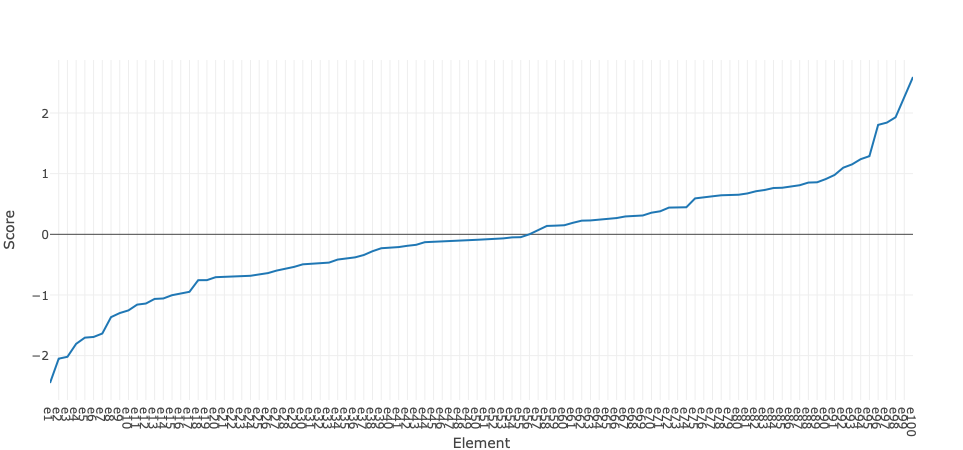

In [8]:
element_score_, element_ = sort_like((element_score_, element_))

plot_x_y((element_score_,); layout = merge(layout, Layout(yaxis_title = "Score")))

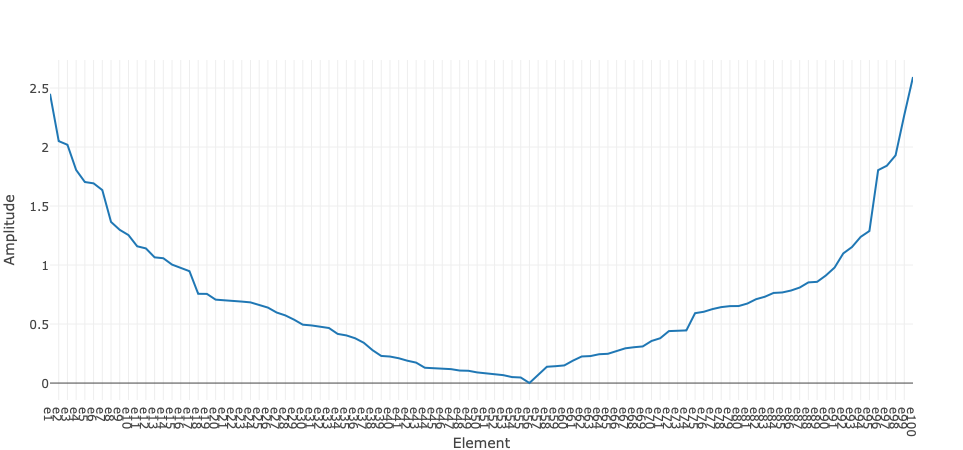

In [9]:
am_ = abs.(element_score_)

plot_x_y((am_,); layout = merge(layout, Layout(yaxis_title = "Amplitude")))

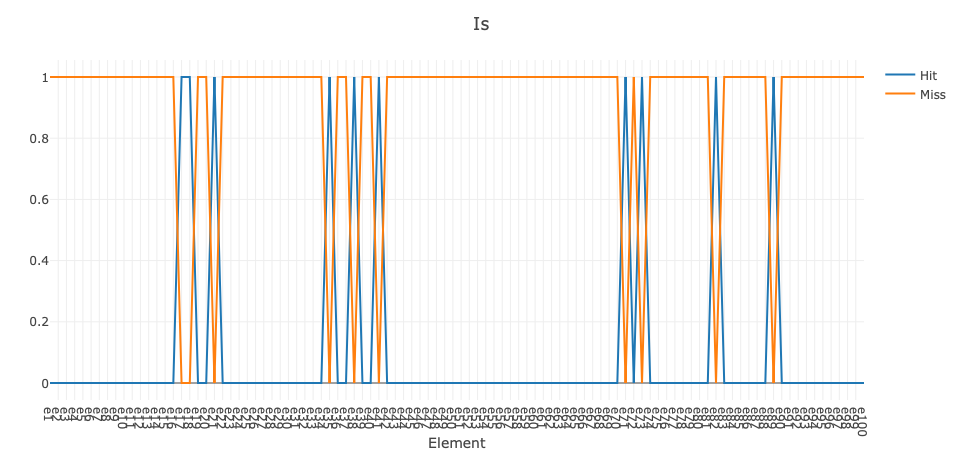

In [10]:
is_h_ = check_is(element_, set_element_)

is_m_ = 1.0 .- is_h_

plot_x_y((is_h_, is_m_); name_ = ("Hit", "Miss"), layout = merge(layout, Layout(title = "Is")))

In [11]:
small_number = eps()

2.220446049250313e-16

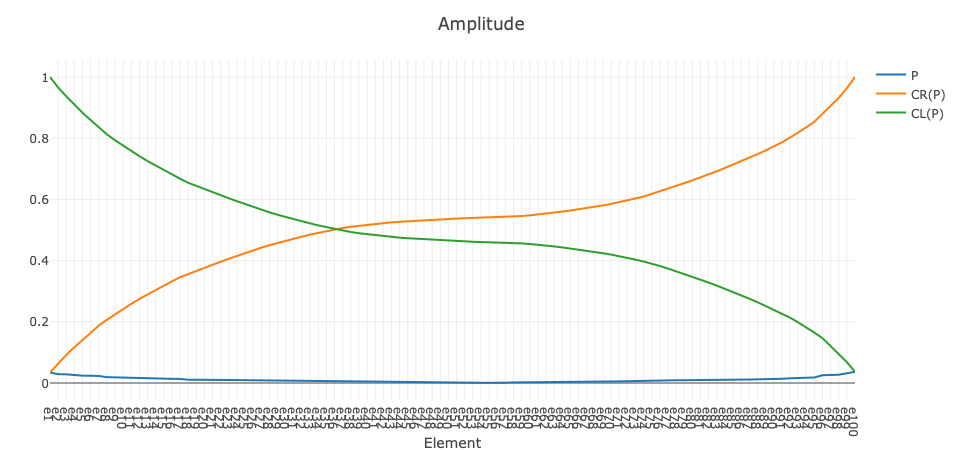

In [12]:
am_p_ = am_ / sum(am_)

am_p_cr_ = cumsum(am_p_) .+ small_number

am_p_cl_ = cumulate_sum_reverse(am_p_) .+ small_number

plot_x_y((am_p_, am_p_cr_, am_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude")))

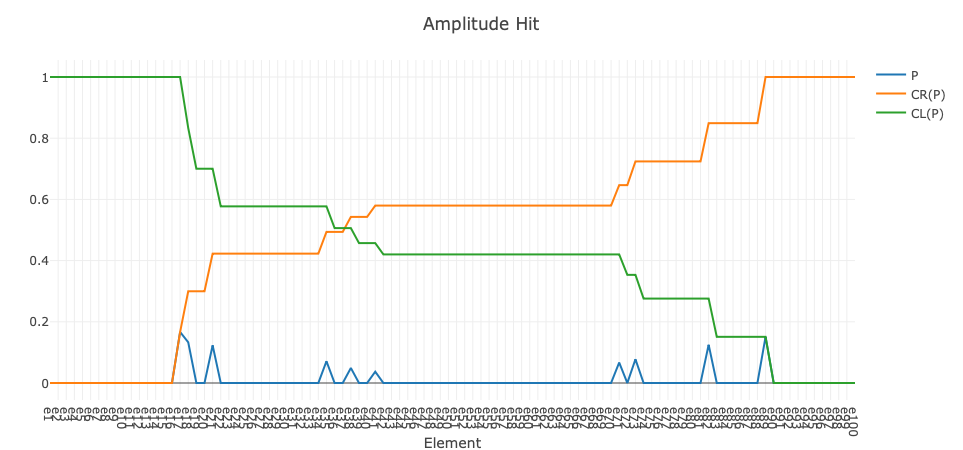

In [13]:
am_h_ = am_ .* is_h_

am_h_p_ = am_h_ / sum(am_h_)

am_h_p_cr_ = cumsum(am_h_p_) .+ small_number

am_h_p_cl_ = cumulate_sum_reverse(am_h_p_) .+ small_number

plot_x_y((am_h_p_, am_h_p_cr_, am_h_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude Hit")))

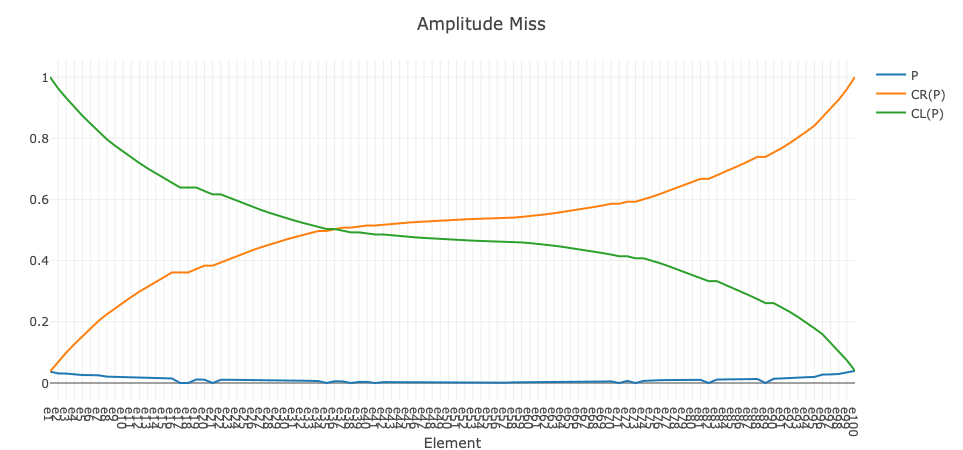

In [14]:
am_m_ = am_ .* is_m_

am_m_p_ = am_m_ / sum(am_m_)

am_m_p_cr_ = cumsum(am_m_p_) .+ small_number

am_m_p_cl_ = cumulate_sum_reverse(am_m_p_) .+ small_number

plot_x_y((am_m_p_, am_m_p_cr_, am_m_p_cl_); name_ = ("P", "CR(P)", "CL(P)"), layout = merge(layout, Layout(title = "Amplitude Miss")))

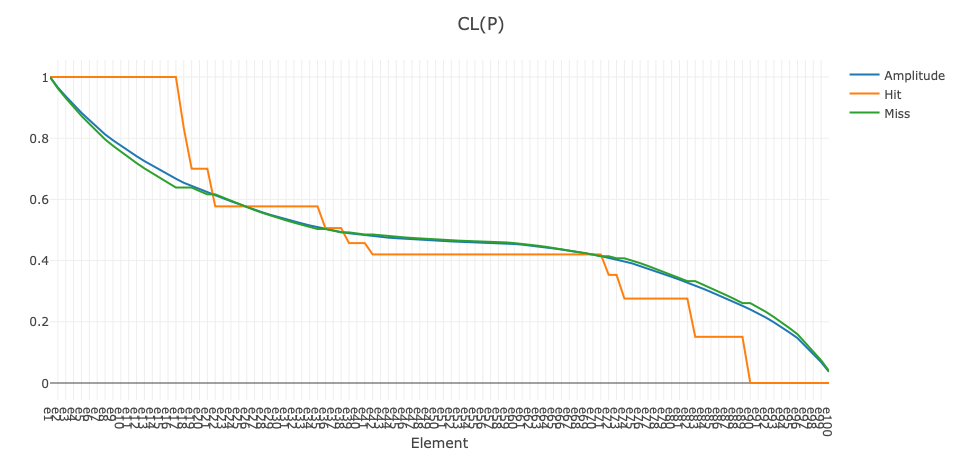

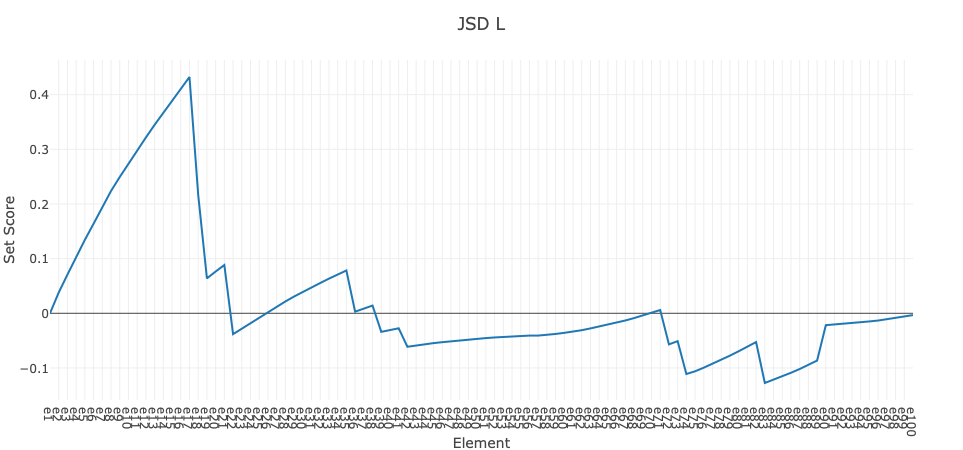

In [20]:
display(plot_x_y((am_p_cl_, am_h_p_cl_, am_m_p_cl_); name_ = ("Amplitude", "Hit", "Miss"), layout = merge(layout, Layout(title = "CL(P)"))))

jsd_l_ = compute_jsd(am_h_p_cl_, am_m_p_cl_, am_p_cl_)

plot_x_y((jsd_l_,); layout = merge(layout, Layout(title = "JSD L", yaxis_title = "Set Score")))

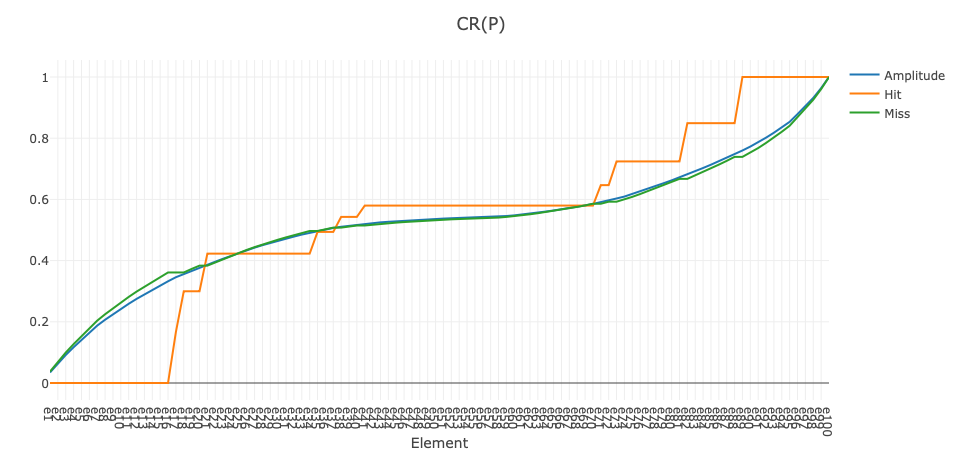

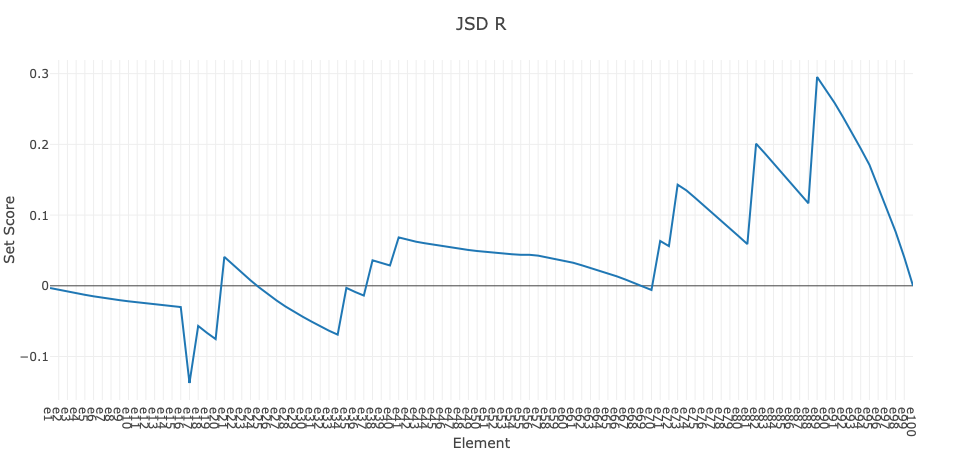

In [21]:
display(plot_x_y((am_p_cr_, am_h_p_cr_, am_m_p_cr_); name_ = ("Amplitude", "Hit", "Miss"), layout = merge(layout, Layout(title = "CR(P)"))))

jsd_r_ = compute_jsd(am_h_p_cr_, am_m_p_cr_, am_p_cr_)

plot_x_y((jsd_r_,); layout = merge(layout, Layout(title = "JSD R", yaxis_title = "Set Score")))

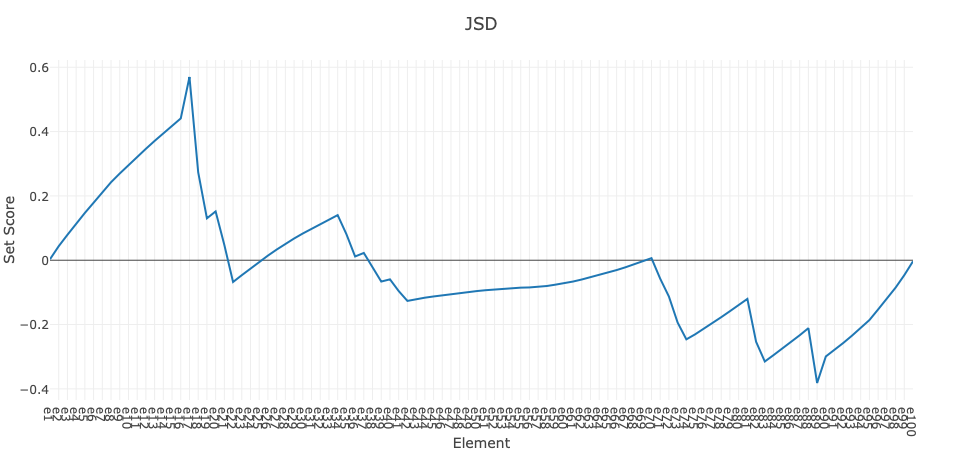

In [22]:
pk_ = jsd_l_ - jsd_r_

plot_x_y((pk_,); layout = merge(layout, Layout(title = "JSD", yaxis_title = "Set Score")))

In [23]:
set_score_ = pk_

mi = minimum(set_score_)

ma = maximum(set_score_)

if abs(mi) < abs(ma)

    extreme = ma

else

    extreme = mi

end

area = sum(set_score_)

set_score_, extreme, area

([0.003111037736585855, 0.04371565024501133, 0.07902511469260104, 0.11448847999972606, 0.14712602723545556, 0.17877549195291048, 0.21092035596470074, 0.24247483560706656, 0.26962272006775106, 0.2959954628934869  …  -0.279235831031291, -0.2572667140915541, -0.23451786162774274, -0.21053333916866698, -0.18599490111439043, -0.1529437780821162, -0.11943720891194204, -0.0852642803130658, -0.04641873968402191, -0.0032915200012637513], 0.5696895482334223, -2.5868101042224474)